<a href="https://colab.research.google.com/github/michelmartinss/Regressao_Linear_Marketing/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importar bibliotecas e carregar os dados

In [ ]:
# Exploração de dados
import pandas as pd
import numpy as np

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#metrica
from sklearn.metrics import r2_score


In [ ]:
#Fazer o upload do arquivo
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT.csv


In [ ]:
# Carregar o Arquivo
df = pd.read_csv('/content/MKT.csv')

### 01 - Análise Descritiva

In [ ]:
# Visualizar os 5 primeiros registros das tabelas
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Visualizar as variáveis, os tipos, a qtd de coluna, qtd de registros e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Resumo Estatístico
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### 02 - Análise Exploratória

In [ ]:
# Visualizar o total de investimento nas diferentes mídias sociais

# Calcular o total de cada variável excluindo 'sales'
df_total = df.drop(columns=['sales']).sum()

# Formatando os rótulos como números
formatted_labels = [f'{round(value):,}' for value in df_total.values]

# Criar um gráfico de barras
fig = go.Figure()

# Adicionar barras para cada variável
fig.add_trace(go.Bar(x=df_total.index, y=df_total.values, text=formatted_labels,textposition='auto',
                     textfont=dict(size=36), marker=dict(color='#1f77b4')))

# Personalizar layout
fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')
fig.update_layout(xaxis=dict(title='Variáveis'),
                  yaxis=dict(title='Total'),
                  title='Total de Investimento por Midia Social',
                  plot_bgcolor='white',
                  paper_bgcolor='white'
)

# Exibir o gráfico
fig.show()

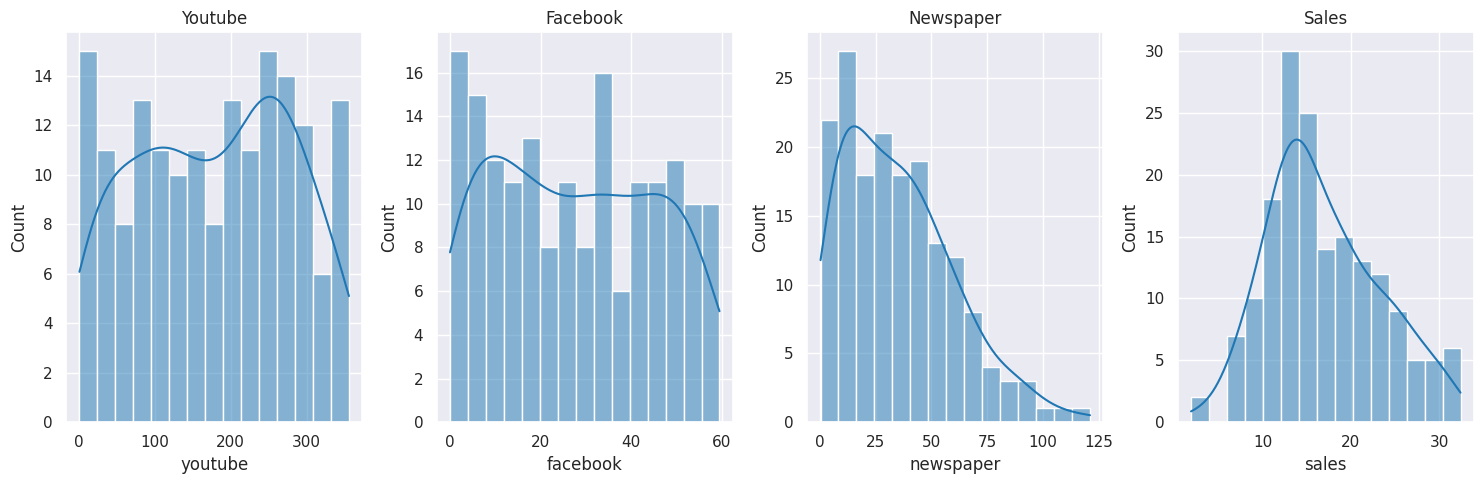

In [ ]:
# Visualiar a distribuição dos dados da variáveis através de histogramas

# Configuração do estilo do seaborn
sns.set(style="darkgrid")

# Criar subplots com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Criar histogramas para cada coluna
for i, col in enumerate(['youtube', 'facebook', 'newspaper', 'sales']):
    sns.histplot(data=df, x=col, stat="count", kde=True, bins=15, ax=axes[i], color='#1f77b4')
    axes[i].set_title(col.capitalize())

# Ajustar layout
plt.tight_layout()
plt.show()

In [ ]:
# Visualizar a distribuição das variáveis através do boxsplot,
# demonstrando a distribuição de uma variável numérica, com a mediana , quartis, o máximo e o mínimo

# Criar subplots com 1 linha e 4 colunas, para visualizar as variáveis em uma mesma linha
fig = make_subplots(rows=1, cols=4, subplot_titles=['YouTube', 'Facebook', 'Newspaper', 'Sales'])

# Adicionar gráficos de caixa aos subplots
for i, col in enumerate(['youtube', 'facebook', 'newspaper', 'sales'], 1):
    trace = go.Box(y=df[col], name=col, boxpoints='all', jitter=0.3, pointpos=-1.8,
                   marker=dict(color='#1f77b4', size=5, symbol='circle'),
                   line=dict(color='#1f77b4', width=2))
    fig.add_trace(trace, row=1, col=i)

# Personalizar layout
fig.update_layout(
    height=400,  # Altura total da figura
    showlegend=False,  # Não mostrar a legenda para cada gráfico de caixa
)

# Personalizar a cor de fundo e da linha de eixo para cada subplot
for i in range(1, 5):
    fig.update_xaxes(showline=True, showgrid=False, linecolor='black', row=1, col=i)
    fig.update_yaxes(showline=True, showgrid=False, linecolor='black', row=1, col=i)

# Definir o fundo de cada subplot como branco
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)

# Exibir o gráfico
fig.show()

In [ ]:
# Removendo outliers da varialve newspapers
df = df[(df['newspaper']<=100)]


In [ ]:
# Visualizar a correlação entre as variáveis através do Heatmap

# Criar um heatmap personalizado com rótulos
fig = go.Figure()

# Criar rótulos com os valores de z
z_labels = [['%.2f' % val for val in row] for row in df.corr().values]
heatmap = go.Heatmap(
    z=df.corr(),
    x=df.columns,
    y=df.columns,
    colorscale='blues',
    colorbar=dict(title='Correlação')
    )

fig.add_trace(heatmap)

# Adicionar rótulos fixos
for i, row in enumerate(df.columns):
    for j, col in enumerate(df.columns):
        fig.add_trace(go.Scatter(
            x=[col],
            y=[row],
            mode='text',
            text=[z_labels[i][j]],
            showlegend=False,
            textfont=dict(size=14, color='black', family='Arial'),
            textposition='middle center')
        )

# Personalizar layout
fig.update_layout(title='Heatmap de Correlação entre as variáveis YouTube, Facebook, Newspaper e Sales')

# Exibir o gráfico
fig.show()

In [ ]:
# Criar um gráfico de dispersão através do scatterplot

# Criar subplots com 1 linha e 3 colunas
fig = make_subplots(rows=1, cols=3, subplot_titles=['YouTube', 'Facebook', 'Newspaper'])

# Adicionar gráficos de dispersão com linha de tendência aos scatterplots
for i, col in enumerate(['youtube', 'facebook', 'newspaper'], 1):
    scatter_trace = go.Scatter(x=df[col], y=df['sales'], mode='markers', name=f'{col} vs Sales',
                              marker=dict(color='#1f77b4', size=8, symbol='circle'))

    # Calcular a regressão linear
    coefficients = np.polyfit(df[col], df['sales'], 1)
    line_y = np.polyval(coefficients, df[col])

    # Adicionar a linha de tendência (regressão linear)
    trace_trendline = go.Scatter(x=df[col], y=line_y, mode='lines',
                                name=f'{col} Trendline', line=dict(color='red', width=2), showlegend=False)

    fig.add_trace(scatter_trace, row=1, col=i)
    fig.add_trace(trace_trendline, row=1, col=i)

# Personalizar layout
fig.update_layout(
    height=400,  # Altura total da figura
    showlegend=False,  # Mostrar a legenda para cada gráfico de dispersão
)

# Personalizar a cor de fundo e da linha de eixo para cada subplot
for i in range(1, 4):
    fig.update_xaxes(showline=True, showgrid=False, linecolor='black', row=1, col=i, title_text='')
    fig.update_yaxes(showline=True, showgrid=False, linecolor='black', row=1, col=i, title_text='Sales')
    fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

# Exibir o gráfico
fig.show()

### 03 - Modelagem

In [ ]:
# Definindo o eixo X com as variáveis de investimentos e o eixo Y com as vendas, para aplicar o
# modelo de Regressão Linear e prever os valores de vendas ('sales')

x = df[['youtube', 'facebook', 'newspaper']]
y = df[['sales']]

In [ ]:
# Divisão dos dados entre treino e teste, para aplicar o modelo de Regressão Linear

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, random_state=42)
lm = LinearRegression()

In [ ]:
# Visualindo a divisão dos dados em treino e teste

print(f'Treino do eixo X: {X_train.shape}')
print(f'Teste do eixo X: {X_test.shape}')
print(f'Treino do eixo y: {Y_train.shape}')
print(f'Teste do eixo y: {Y_test.shape}')

Treino do eixo X: (117, 3)
Teste do eixo X: (51, 3)
Treino do eixo y: (117, 1)
Teste do eixo y: (51, 1)


In [ ]:
# treinado o modelo

lm.fit(X_train, Y_train)

LinearRegression()

### 04 - Calculando predição


In [ ]:
# Calculando a predição

y_pred = lm.predict(X_test)

In [ ]:
# Calculando a métrica do R²
r = r2_score(Y_test, y_pred)
print(f"r_quadrado: {r:.4f}")

r_quadrado: 0.9153


In [ ]:
# Comparando Y_test vs y_pred

index = [i for i in range(1, 52, 1)]

# Criação do trace para as vendas reais
trace1 = go.Scatter(x=index, y=Y_test['sales'].values, mode='lines', name='Y_test', marker=dict(color='blue'))

# Criação do trace para as previsões
trace2 = go.Scatter(x=index, y=y_pred.flatten(), mode='lines', name='y_pred', marker=dict(color='red'))

# Criação da figura
fig = go.Figure(data=[trace1, trace2])

# Personalizar layout
fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')
fig.update_layout(xaxis=dict(title='Index'),
                  yaxis=dict(title='Sales'),
                  title='Y_test vs y_pred',
                  plot_bgcolor='white',
                  paper_bgcolor='white'
)

# Exibição do gráfico
fig.show()

In [ ]:
# Analisando a predição de valores específicos

youtube = 177
facebook = 27
newspaper = 33
entrada = [[youtube, facebook, newspaper]]
predict = lm.predict(entrada)[0]
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([16.74040425])

In [ ]:
# Aplicando o modelo de regressão da base inteira, para avaliar como seria a predição dos valores usados para gerar o modelo lm

# Vamos criar um DataFrame para armazenar as previsões
df_pred = pd.DataFrame(index=df.index) # Novo DataFrame vazio com o mesmo índice (linhas) que o DataFrame original

# Adicionando as previsões ao DataFrame
df_pred['sales_pred'] = lm.predict(df[['youtube', 'facebook', 'newspaper']])

# Concatenando o DataFrame de previsões ao DataFrame original
df = pd.concat([df, df_pred['sales_pred']], axis=1)

In [ ]:
# Visualizando as nova coluna criada com a predição

df.head()

,youtube,facebook,newspaper,sales,sales_pred
0,84.72,19.20,48.96,12.60,11.362580
1,351.48,33.96,51.84,25.68,26.239784
2,135.48,20.88,46.32,14.28,13.946066
3,116.64,1.80,36.00,11.52,9.538400
4,318.72,24.00,0.36,20.88,22.215712


In [ ]:
# Calculando o R² para a base completa, considerando sales como teste e o sales_pred, é a predição das vendas

r2_full = r2_score(df['sales'], df['sales_pred'])

# Exibe o valor de R² para a base de dados completa
print(f"R² para a base de dados completa: {r2_full:.4f}")

R² para a base de dados completa: 0.9018


In [ ]:
# Comparando as duas colunas: sales vs sales_pred

c = [i for i in range(1, 169, 1)]

# Criação do trace para as vendas reais
trace1 = go.Scatter(x=c, y=df['sales'], mode='lines', name='Real Sales', marker=dict(color='blue'))

# Criação do trace para as previsões
trace2 = go.Scatter(x=c, y=df['sales_pred'], mode='lines', name='Predicted Sales', marker=dict(color='red'))

# Criação da figura
fig = go.Figure(data=[trace1, trace2])

# Personalizar layout
fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')
fig.update_layout(xaxis=dict(title='Index'),
                  yaxis=dict(title='Sales'),
                  title='Real Sales vs Predicted Sales',
                  plot_bgcolor='white',
                  paper_bgcolor='white'
)

# Exibição do gráfico
fig.show()

In [ ]:
# Michel Martins da Silva